In [ ]:
import pandas as pd



df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()



df.size



df.shape



df.dtypes



X=df.drop(['Exited'],axis=1)
y=df['Exited']



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)





numerical_features=X_train.select_dtypes(include=["int64","float64"]).columns
nun_numerical_features=X_train.select_dtypes(include=[object]).columns





from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
Numeric_transformer=StandardScaler()
Non_numeric_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(
    transformers=[
        ('num',Numeric_transformer,numerical_features),
        ('non_num',Non_numeric_transformer,nun_numerical_features)
    ]
)






X_train_processed=preprocessor.fit_transform(X_train)
X_test_processed=preprocessor.transform(X_test)
X_train_processed=X_train_processed.toarray()
X_test_processed=X_test_processed.toarray()






import keras
from keras.models import Sequential
from keras.layers import Dense




model=Sequential()
model.add(Dense(units=64,activation='relu',input_dim=X_train_processed.shape[1]))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))





model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_processed,y_train,epochs=10,batch_size=32,validation_split=0.2)





predictions=model.predict(X_test_processed)




predictions.round()




from sklearn.metrics import accuracy_score
accuracy_score(predictions.round(),y_test)




from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(predictions.round(),y_test)
confusion_mat=pd.DataFrame(conf_mat,index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])




import seaborn as sns
sns.heatmap(confusion_mat,cmap='coolwarm',annot=True)


In [34]:
import pandas as pd

In [35]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.size

140000

In [38]:
df.shape

(10000, 14)

In [39]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [40]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
numerical_features=X_train.select_dtypes(include=["int64","float64"]).columns
nun_numerical_features=X_train.select_dtypes(include=[object]).columns

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
Numeric_transformer=StandardScaler()
Non_numeric_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(
    transformers=[
        ('num',Numeric_transformer,numerical_features),
        ('non_num',Non_numeric_transformer,nun_numerical_features)
    ]
)

In [45]:
X_train_processed=preprocessor.fit_transform(X_train)
X_test_processed=preprocessor.transform(X_test)

X_train_processed=X_train_processed.toarray()
X_test_processed=X_test_processed.toarray()

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [50]:
model=Sequential()
model.add(Dense(units=64,activation='relu',input_dim=X_train_processed.shape[1]))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(X_train_processed,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7460 - loss: 0.5519 - val_accuracy: 0.8406 - val_loss: 0.4009
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8556 - loss: 0.3661 - val_accuracy: 0.8475 - val_loss: 0.3685
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8874 - loss: 0.2862 - val_accuracy: 0.8363 - val_loss: 0.3898
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9081 - loss: 0.2308 - val_accuracy: 0.8206 - val_loss: 0.4241
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9322 - loss: 0.1848 - val_accuracy: 0.8081 - val_loss: 0.4811
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9427 - loss: 0.1545 - val_accuracy: 0.7844 - val_loss: 0.5369
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9587 - loss: 0.1206 - val_accuracy: 0.8006 - val_loss: 0.5503
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9729 - loss: 0.0893 - val_accuracy: 0.

In [54]:
predictions=model.predict(X_test_processed)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [59]:
predictions.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions.round(),y_test)

0.792

In [64]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(predictions.round(),y_test)

In [65]:
confusion_mat=pd.DataFrame(conf_mat,index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

<Axes: >

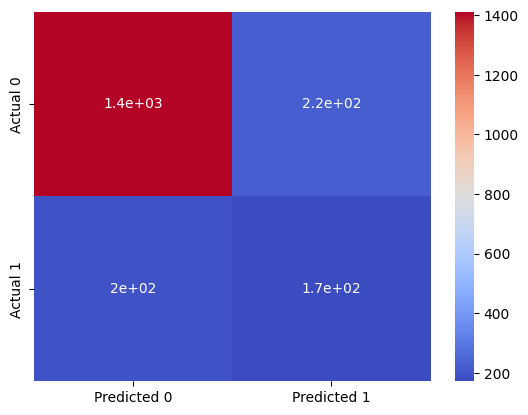

In [66]:
import seaborn as sns
sns.heatmap(confusion_mat,cmap='coolwarm',annot=True)